# Code to create agents and teams

This notebook shows the code flow to create agents and teams using flo-ai

In [1]:
from flo_ai import FloSupervisor, FloAgent, FloSession, FloTeam, FloLinear, Flo, FloLLMAgent
from langchain_openai import ChatOpenAI
from flo_ai.models.flo_reflection_agent import FloReflectionAgent
from flo_ai.models.delegate import Delegate
from langchain_community.tools.tavily_search.tool import TavilySearchResults
from dotenv import load_dotenv

load_dotenv()

True

Code to create a simple tea, with 2 agents, each agent having one tool of itself

In [2]:
llm = ChatOpenAI(temperature=0, model_name='gpt-4o')
session = FloSession(llm).register_tool(
    name="TavilySearchResults",
    tool=TavilySearchResults()
)

researcher = FloAgent.create(
    session,
    name="Researcher", 
    role="Internet Researcher", # optional
    job="Do a research on the internet and find articles of relevent to the topic asked by the user", 
    tools=[TavilySearchResults()]
)

blogger = FloAgent.create(
    session, 
    name="BlogWriter", 
    role="Thought Leader", # optional
    job="Able to write a blog using information provided", 
    tools=[TavilySearchResults()]
)

marketing_team = FloTeam.create(session, "Marketing", [researcher, blogger])
head_of_marketing = FloSupervisor.create(session, "Head-of-Marketing", marketing_team)
marketing_flo = Flo.create(session, routed_team=head_of_marketing)


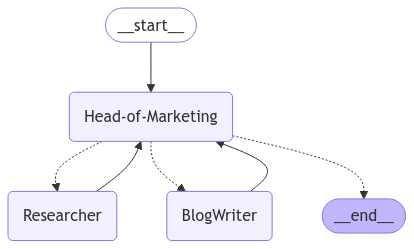

In [3]:
marketing_flo.draw()

A second team created for doing editorial suggestions

In [4]:
chief_editorial = FloLLMAgent.create(
    session, 
    name="Senior-Editor", 
    job="Have a look at the article created and give editorial suggestions"
)

edit_team = FloTeam.create(
    session, 
    name="Editorial-Team", 
    members=[chief_editorial]
)

editor = FloSupervisor.create(
    session, 
    name="Editor-Team-Routing", 
    team=edit_team
)

editorial_flo = Flo.create(session, routed_team=editor)

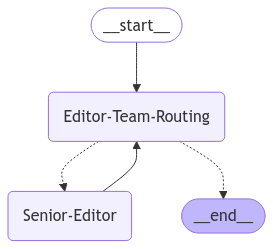

In [5]:
editorial_flo.draw()

In [6]:
journal_company = FloTeam.create(session, "Newspaper", [marketing_flo, editorial_flo])

r3 = FloLinear.create(
    session,
    "linear-router",
    journal_company
)

master_flo = Flo.create(session, routed_team=r3)

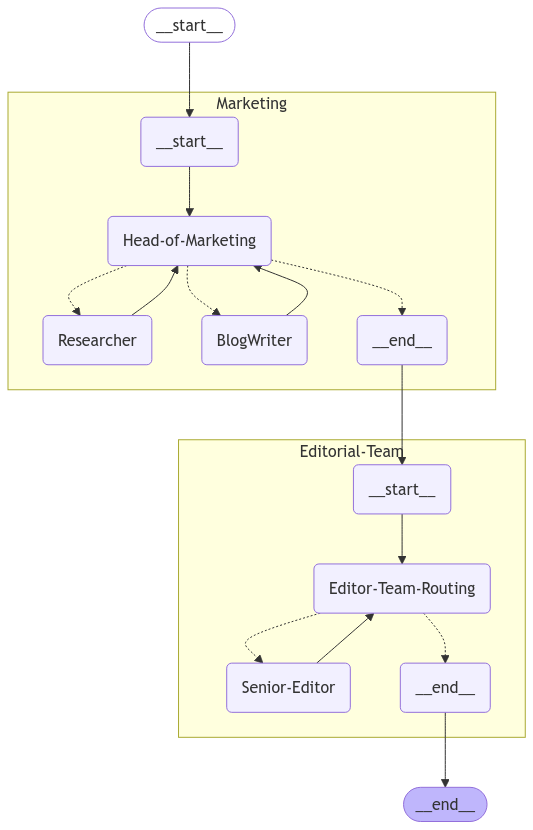

In [7]:
master_flo.draw()

In [8]:
# master_flo.invoke("Write an article about CR7")

In [8]:
reflection_agent = FloReflectionAgent.create(
    session,
    "journal-reflection",
    "You are critic who looks are the article and create a list of improvements that can be done.",
    Delegate(to=["Marketing"], retry=1)
)

journal_company_with_reflection = FloTeam.create(session, "Newspaper", [marketing_flo, editorial_flo, reflection_agent])

company = FloLinear.create(
    session,
    "linear-router",
    journal_company_with_reflection
)

company_flo = Flo.create(session, routed_team=company)

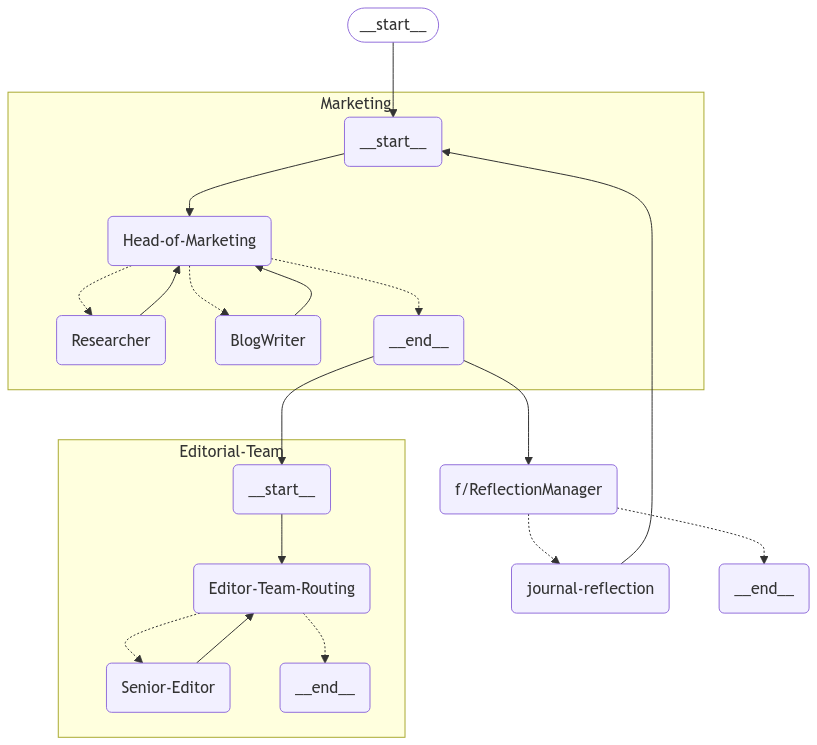

In [9]:
company_flo.draw()